In [23]:
# Import the numpy library for numerical operations
import numpy as np
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt
# Import the math module for mathematical functions
import math,cmath
from scipy import integrate
from scipy.special import jv,yv,j1

In [24]:
# 定义一个变量f0，其值为2.25乘以10的6次方，代表频率
f0 = 4e6
# 定义一个变量c0，其值为1500.0，代表声速
c0 = 1500.0
# 定义一个变量u，其值为1.0乘以10的3次方，代表质点速度
u = 1.0e3
# 定义一个变量p，其值为1.0乘以10的3次方，代表声压
p = 1.0e3
# 计算角频率w，公式为2乘以π乘以频率f0
w = 2 * math.pi * f0
# 计算波长lamd，公式为声速c0除以频率f0
lamd = c0 / f0
# 计算波数k，公式为2乘以π除以波长lamd
k = 2 * math.pi / lamd

# 定义变量 F，焦距
F = 20e-3

difL = lamd*2/5

N = 6

Rmax = 9.5e-3

In [25]:
Rin = np.zeros(N)
Rout = np.zeros(N)
wc = np.zeros(N)
Rc = np.zeros(N)
delay = np.zeros(N)

In [26]:
def CalTrans(Rmax,difL,N):
    maxArea = math.pi * (Rmax **2)
    avgArea = (maxArea-(N-1)*2*math.pi*Rmax/2*difL) / N
    avgWeight = (Rmax-(N-1)*difL)/N
    maxDifL = difL

    print(avgWeight,maxDifL)
    
    Rin[0] = 1e-9
    Rout[0] = avgWeight

    print(Rin[0],Rout[0])
    
    for i in np.arange(1,N):
        Rin[i] = Rout[i-1] + maxDifL
        Rout[i] = Rin[i] + avgWeight
        print("Rin[%d]:"%i,Rin[i],"Rout[%d]:"%i,Rout[i])
    

    for i in np.arange(N):
        wc[i] = avgWeight
        Rc[i] = (Rout[i] + Rin[i])/2
        delay[i] = (math.sqrt(Rc[i]**2+F**2)-math.sqrt((Rc[0])**2+F**2))/c0
        print("wc[%d]:"%i,wc[i],"Rc[%d]:"%i,Rc[i],"delay[%d]:"%i,delay[i])

In [27]:
def Jf(a,xita):
    if a == 0:
        ret = 2.0
    else:
        tmp = 2*j1(k*a*math.sin(xita))
        ret = tmp/(k*a*math.sin(xita))

    return ret

In [28]:
def SoundPower(r, Rin, Rout, xita, t):
    """
    计算特定条件下的声功率。

    参数:
    r (float): 距离声源的距离。
    Rin (float): 内半径。
    Rout (float): 外半径。
    xita (float): 角度。
    t (float): 时间。

    返回:
    float: 计算得到的声功率的绝对值。
    """
    
    assert Rin <= Rout, "内半径不能大于外半径"
    assert -np.pi/2 <= xita <= np.pi/2, "角度必须在 -π/2 到 π/2 之间"
    # 计算 t1，w、p、u 应为全局变量，t1 可能代表与距离相关的声功率系数
    t1 = w*p*u/r
    # 计算 t2，调用 Jf 函数结合外半径计算相关值
    t2 = Rout**2*Jf(Rout, xita)
    # 计算 t3，调用 Jf 函数结合内半径计算相关值
    t3 = Rin**2*Jf(Rin, xita)
    # 计算 t4，使用复数指数函数，考虑了时间和距离对声功率的影响
    t4 = cmath.exp(complex(0, 1)*(w*t - k*r))
    # 打印中间计算结果，用于调试
    # print(t1, t2, t3, t4)
    # 返回最终计算得到的声功率的值
    return (t1*(t2 - t3)*t4)


In [29]:
import pytest


# 测试用例
def test_SoundPower():
    # 正常情况测试
    result = SoundPower(1.0, 0.5, 1.5, np.pi/4, 2.0)
    assert isinstance(result, complex)

    # 距离为 0 测试
    with pytest.raises(ZeroDivisionError):
        SoundPower(0, 0.5, 1.5, np.pi/4, 2.0)

    # 内半径大于外半径测试
    with pytest.raises(AssertionError):
        SoundPower(1.0, 1.5, 0.5, np.pi/4, 2.0)

# 解释代码
# 这个单元测试用例主要覆盖了以下几种情况：
# 1. 正常情况：提供了一组合理的参数进行测试，验证函数返回值的类型为浮点数。
# 2. 距离为 0：尝试传入距离为 0，期望引发除零错误。
# 3. 内半径大于外半径：尝试传入内半径大于外半径的参数，期望引发断言错误。



In [30]:
test_SoundPower()

(6, 200)
0.0014583333333333332 0.00015000000000000001
1e-09 0.0014583333333333332
Rin[1]: 0.0016083333333333331 Rout[1]: 0.0030666666666666663
Rin[2]: 0.0032166666666666663 Rout[2]: 0.0046749999999999995
Rin[3]: 0.004824999999999999 Rout[3]: 0.006283333333333333
Rin[4]: 0.006433333333333333 Rout[4]: 0.007891666666666665
Rin[5]: 0.008041666666666666 Rout[5]: 0.009499999999999998
wc[0]: 0.0014583333333333332 Rc[0]: 0.0007291671666666665 delay[0]: 0.0
wc[1]: 0.0014583333333333332 Rc[1]: 0.0023374999999999997 delay[1]: 8.189775828349594e-08
wc[2]: 0.0014583333333333332 Rc[2]: 0.0039458333333333324 delay[2]: 2.4815772533701617e-07
wc[3]: 0.0014583333333333332 Rc[3]: 0.005554166666666666 delay[3]: 4.957394384463414e-07
wc[4]: 0.0014583333333333332 Rc[4]: 0.007162499999999999 delay[4]: 8.203786830114265e-07
wc[5]: 0.0014583333333333332 Rc[5]: 0.008770833333333332 delay[5]: 1.2169216826181499e-06


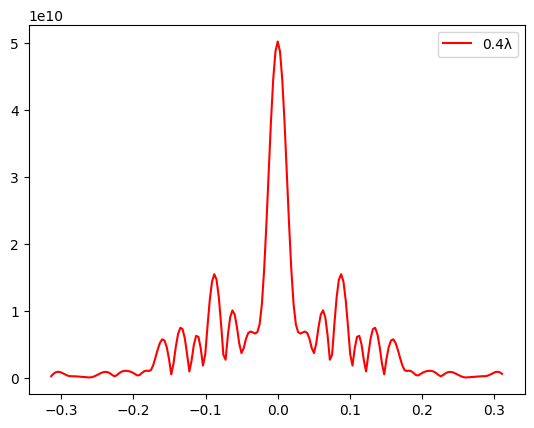

In [40]:
xita = np.arange(-np.pi/10, np.pi/10, np.pi/1000)
Psound = np.zeros([N,len(xita)],dtype=complex)
print(Psound.shape)

CalTrans(Rmax,lamd*2/5,N)
for i in np.arange(0,N):
    for j in np.arange(0,len(xita)):
        Psound[i][j] = SoundPower(F,Rin[i],Rout[i],xita[j],delay[0]-delay[i])   
Psound_sum_abs = np.absolute(np.sum(Psound,axis=0)) 


plt.plot(xita,Psound_sum_abs,color='red',label='0.4λ')
plt.legend()    

In [32]:
def TestPsoundVSdiffL(difL):
    CalTrans(Rmax,difL,N)
    for i in np.arange(0,N):
        for j in np.arange(0,len(xita)):
            Psound[i][j] = SoundPower(F,Rin[i],Rout[i],xita[j],delay[0]-delay[i])   
    ret = np.absolute(np.sum(Psound,axis=0))
    return ret

dif_List[0] 7.500000000000001e-05
0.0015208333333333332 7.500000000000001e-05
1e-09 0.0015208333333333332
Rin[1]: 0.0015958333333333332 Rout[1]: 0.0031166666666666665
Rin[2]: 0.0031916666666666664 Rout[2]: 0.0047125
Rin[3]: 0.0047875 Rout[3]: 0.006308333333333333
Rin[4]: 0.006383333333333334 Rout[4]: 0.007904166666666667
Rin[5]: 0.007979166666666667 Rout[5]: 0.009500000000000001
wc[0]: 0.0015208333333333332 Rc[0]: 0.0007604171666666666 delay[0]: 0.0
wc[1]: 0.0015208333333333332 Rc[1]: 0.00235625 delay[1]: 8.257927199548098e-08
wc[2]: 0.0015208333333333332 Rc[2]: 0.0039520833333333335 delay[2]: 2.481895548552872e-07
wc[3]: 0.0015208333333333332 Rc[3]: 0.005547916666666666 delay[3]: 4.938498094019874e-07
wc[4]: 0.0015208333333333332 Rc[4]: 0.007143750000000001 delay[4]: 8.15393832290535e-07
wc[5]: 0.0015208333333333332 Rc[5]: 0.008739583333333335 delay[5]: 1.207791833155993e-06
dif_List[1] 0.00015000000000000001
0.0014583333333333332 0.00015000000000000001
1e-09 0.0014583333333333332
Rin

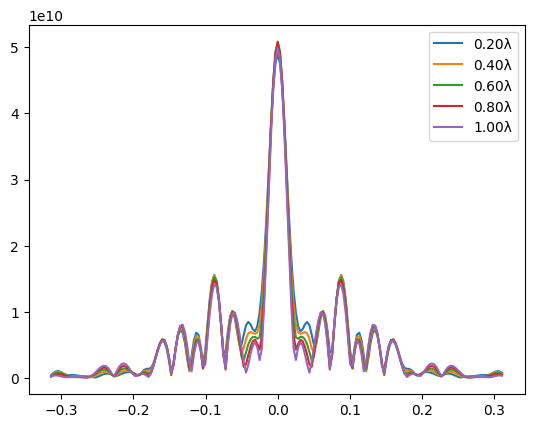

In [33]:
dif_List = np.zeros(5)
Psound_sum_abs
for i in np.arange(0,5,1):
    dif_List[i] = lamd*(i+1)/5
    print("dif_List[%d]"%i,dif_List[i])
    Psound_sum_abs = TestPsoundVSdiffL(dif_List[i])
    plt.plot(xita,Psound_sum_abs,label='%.2fλ'%((i+1)/5))
plt.legend()  

(6, 1000)
-0.0
-7.972718289854057e-08
-2.478746701636674e-07
-5.012203680130542e-07
-8.351969260067283e-07
-1.2442661307309037e-06


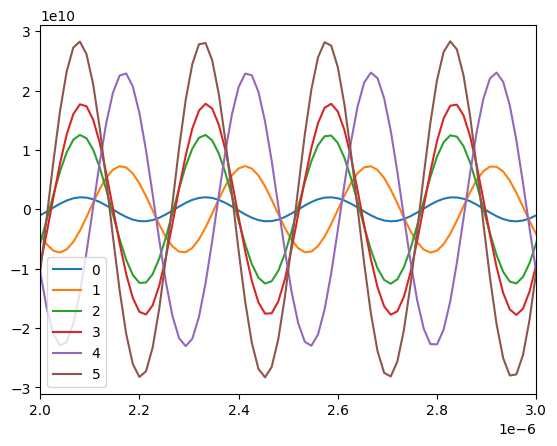

In [34]:
tdelay = np.arange(0, F/c0, F/c0/1000)
Psound_time = np.zeros([N,len(tdelay)],dtype=complex)
print(Psound_time.shape)

for i in np.arange(0,N):
    print(-delay[i])
    for j in np.arange(0,len(tdelay)):
        Psound_time[i][j] = SoundPower(F,Rin[i],Rout[i],1e-9,tdelay[j]-delay[i])

x = tdelay
plt.xlim([2e-6, 3e-6])
plt.plot(x,Psound_time[0],label='0')
plt.plot(x,Psound_time[1],label='1')
plt.plot(x,Psound_time[2],label='2')
plt.plot(x,Psound_time[3],label='3')
plt.plot(x,Psound_time[4],label='4')
plt.plot(x,Psound_time[5],label='5')    
plt.legend()

In [35]:
def AxisSoundPower(r,Rin,Rout,t):
    R1 = math.sqrt(Rout**2+r**2)
    R2 = math.sqrt(Rin**2 +r**2)
    t1 = p*c0*u
    t2 = cmath.exp(complex(0,-1)*(k*R1))
    t3 = cmath.exp(complex(0,-1)*(k*R2))
    t4 = cmath.exp(complex(0,1)*(w*t))

    #print(t1,t2,t3,t4)
    return (t1*(t2-t3)*t4)    

0.0015208333333333332 7.500000000000001e-05
1e-09 0.0015208333333333332
Rin[1]: 0.0015958333333333332 Rout[1]: 0.0031166666666666665
Rin[2]: 0.0031916666666666664 Rout[2]: 0.0047125
Rin[3]: 0.0047875 Rout[3]: 0.006308333333333333
Rin[4]: 0.006383333333333334 Rout[4]: 0.007904166666666667
Rin[5]: 0.007979166666666667 Rout[5]: 0.009500000000000001
wc[0]: 0.0015208333333333332 Rc[0]: 0.0007604171666666666 delay[0]: 0.0
wc[1]: 0.0015208333333333332 Rc[1]: 0.00235625 delay[1]: 8.257927199548098e-08
wc[2]: 0.0015208333333333332 Rc[2]: 0.0039520833333333335 delay[2]: 2.481895548552872e-07
wc[3]: 0.0015208333333333332 Rc[3]: 0.005547916666666666 delay[3]: 4.938498094019874e-07
wc[4]: 0.0015208333333333332 Rc[4]: 0.007143750000000001 delay[4]: 8.15393832290535e-07
wc[5]: 0.0015208333333333332 Rc[5]: 0.008739583333333335 delay[5]: 1.207791833155993e-06


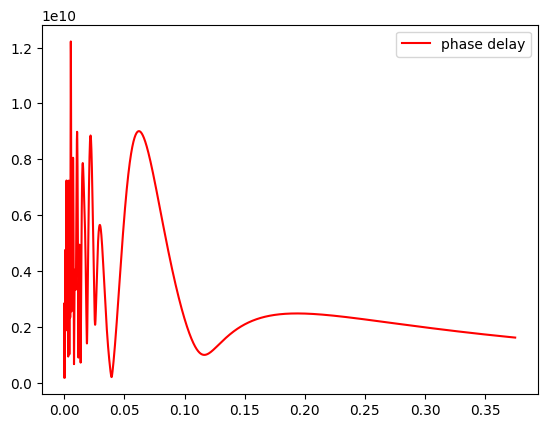

In [36]:
CalTrans(Rmax,difL/2,N)

dis = np.arange(0, 1000*lamd, lamd/20)
Psound_axis = np.zeros([N,len(dis)],dtype=complex)

for i in np.arange(0,N):
    for j in np.arange(0,len(dis)):
        Psound_axis[i][j] = AxisSoundPower(dis[j],Rin[i],Rout[i],delay[0]-delay[i])

dysum = np.absolute(np.sum(Psound_axis,axis=0))

plt.plot(dis,dysum,color='red',label='phase delay')
plt.legend()  

In [37]:
def TestPsoundAxisVSdiffL(difL):
    CalTrans(Rmax,difL,N)
    for i in np.arange(0,N):
        for j in np.arange(0,len(xita)):
            Psound_axis[i][j] = AxisSoundPower(F,Rin[i],Rout[i],delay[0]-delay[i])   
    ret = np.absolute(np.sum(Psound_axis,axis=0))
    return ret

dif_List[0] 7.500000000000001e-05
0.0015208333333333332 7.500000000000001e-05
1e-09 0.0015208333333333332
Rin[1]: 0.0015958333333333332 Rout[1]: 0.0031166666666666665
Rin[2]: 0.0031916666666666664 Rout[2]: 0.0047125
Rin[3]: 0.0047875 Rout[3]: 0.006308333333333333
Rin[4]: 0.006383333333333334 Rout[4]: 0.007904166666666667
Rin[5]: 0.007979166666666667 Rout[5]: 0.009500000000000001
wc[0]: 0.0015208333333333332 Rc[0]: 0.0007604171666666666 delay[0]: 0.0
wc[1]: 0.0015208333333333332 Rc[1]: 0.00235625 delay[1]: 8.257927199548098e-08
wc[2]: 0.0015208333333333332 Rc[2]: 0.0039520833333333335 delay[2]: 2.481895548552872e-07
wc[3]: 0.0015208333333333332 Rc[3]: 0.005547916666666666 delay[3]: 4.938498094019874e-07
wc[4]: 0.0015208333333333332 Rc[4]: 0.007143750000000001 delay[4]: 8.15393832290535e-07
wc[5]: 0.0015208333333333332 Rc[5]: 0.008739583333333335 delay[5]: 1.207791833155993e-06
dif_List[1] 0.00015000000000000001
0.0014583333333333332 0.00015000000000000001
1e-09 0.0014583333333333332
Rin

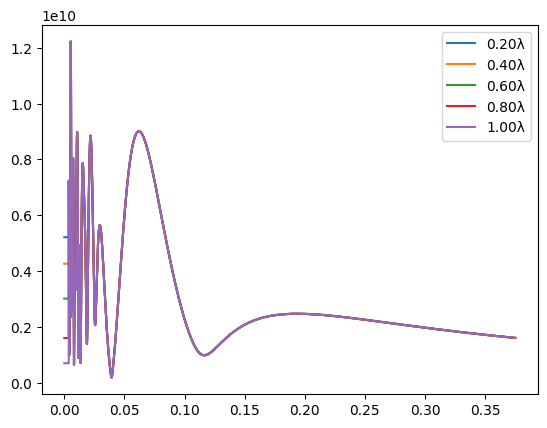

In [38]:
dif_List = np.zeros(5)

for i in np.arange(0,5,1):
    dif_List[i] = lamd*(i+1)/5
    print("dif_List[%d]"%i,dif_List[i])
    Psound_sum_abs_axis = TestPsoundAxisVSdiffL(dif_List[i])
    plt.plot(dis,Psound_sum_abs_axis,label='%.2fλ'%((i+1)/5))
plt.legend()  

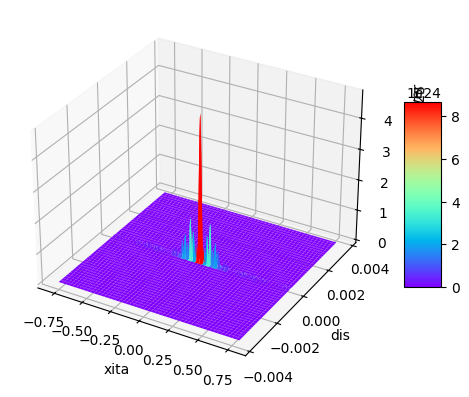

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# 假设 dis 是一个长度为 M 的数组
dis = np.arange(-lamd*10, lamd*10, lamd/10)  # 这里 M 是你需要定义的一个整数
xita = np.arange(-np.pi / 4, np.pi / 4, np.pi / 1000)

# 初始化 Psound 数组，形状为 (M, len(xita))
Psound = np.zeros([N,len(dis), len(xita)], dtype=complex)
Psound_sum = np.zeros([len(dis), len(xita)], dtype=complex)
# 假设 SoundPower 函数可以接受 dis 作为参数
for index in np.arange(N):
    for i in range(len(dis)):
        for j in range(len(xita)):
            Psound[index][i][j] = SoundPower(dis[i], Rin[index], Rout[index], xita[j], delay[0]-delay[index])

for i in range(len(dis)):
        for j in range(len(xita)):
            Psound_sum[i][j] = np.sum(Psound[:,i,j])

# 取 Psound 的绝对值
Psound_abs = np.absolute(Psound_sum)

# 创建三维坐标轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 生成网格数据
X, Y = np.meshgrid(xita, dis)

# 绘制三维曲面图
surf = ax.plot_surface(X, Y, Psound_abs, cmap='rainbow')

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=5)

# 设置坐标轴标签
ax.set_xlabel('xita')
ax.set_ylabel('dis')
ax.set_zlabel('Absolute Sound Power')

# 显示图形
plt.show()
